###### Update 24 Maret 2020

## Model Logistik COVID-19 Indonesia

Prediksi penyebaran COVID-19 di Indonesia ini dibuat dengan  menggunakan model logistik. Model ini telah digunakan pada prediksi penyebaran COVID-19 di Italia (https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d). Notebook ini dimodifikasi dari https://www.kaggle.com/rizkyalifr/logistic-model-for-indonesia-covid-19 . 

# 1. Library

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Input Data

In [ ]:
df=pd.read_csv('../input/indonesia-coronavirus-cases/confirmed_acc.csv')

1. ### Mengubah format tanggal menjadi jumlah hari terhitung dari 22 Januari 2020

In [ ]:
df = df.loc[:,['date','cases']]
FMT = '%m/%d/%Y'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("1/22/2020", FMT)).days  )

In [ ]:
df

# 3. Membuat Model Logistik

Model logistik dapat digambarkan pada rumus: 
    f(x,a,b,c)=  c/(1+e^(-(x-b)/a) )   		         
Dengan a merupakan laju infeksi, b hari maksimum terjadinya infeksi, dan c jumlah orang terinfeksi yang tercatat.


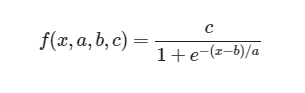

In [ ]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [ ]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,1])
fit = curve_fit(logistic_model,x,y,p0=[2,100,1000])

In [ ]:
A,B=fit
#nilai a,b,c
A

In [ ]:
#a=A[0]
#b=A[1]
#c=A[2]

In [ ]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
errors

In [ ]:
#Kemungkinan terburuk
a=A[0]+errors[0]
b=A[1]+errors[1]
c=A[2]+errors[2]

In [ ]:
#Jumlah hari maksimal dari 22 Januari 
sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))
sol

In [ ]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)# Real data
plt.scatter(x,y,label="Data riil",color="red")

# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,a,b,c) for i in x+pred_x], label="Model Logistik" )

plt.legend()
plt.xlabel("Days since 22 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c*1.1))
plt.show()

> # Koefisien Determinasi
Koefisien Determinasi (R^2) digunakan sebagai ukuran seberapa baik hasil obeservasi direplikasi oleh model. R^2 adalah proporsi dari varians dalam variabel dependen yang dapat diprediksi dari variabel independen. Nilai R^2 dapat dinyatakan dengan rumus berikut:
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e320a2123613f37fa74c48bfcfaf070e54dfc2ee)


In [ ]:
y_pred_logistic = [logistic_model(i,a,b,c) for i in x]
p=mean_squared_error(y,y_pred_logistic)

s1=(np.subtract(y,y_pred_logistic)**2).sum()
s2=(np.subtract(y,np.mean(y))**2).sum()
r=1-s1/s2
print("R^2 adalah {}".format(r))
print("Mean square errornya adalah {}".format(p))

In [ ]:
### Tanggal wabah maksimal
from datetime import timedelta, date
from datetime import datetime  
from datetime import timedelta 

start_date = "22/01/20"

date_1 = datetime.strptime(start_date, "%d/%m/%y")

end_date = date_1 + timedelta(days=sol)

x=end_date.strftime("%d %b %Y")

# Kesimpulan

In [ ]:
print("Jumlah kasus maksimal di indonesia menurut prediksi adalah {:f}".format(A[2]+errors[2])) #Penambahan dengan error
print("Wabah akan berakhir {:.0f} hari setelah 22 Januari 2020 atau {}". format(sol,x))

**Prediksi ini akan lebih akurat jika data yang disediakan lebih baik dan puncak penyebaran telah dilewati.Berbagai faktor, seperti kebijakan social/physical distancing akan berpengaruh pada kasus riil.**

